# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Link to data source:
Verkehrszählstellen Zählwerte Wien: https://www.data.gv.at/katalog/dataset/4707e82a-154f-48b2-864c-89fffc6334e1#resources

### Attributbeschreibung
- JAHR = Zähljahr
- MONAT = Zählmonat
- ZNR = Zählstellenummer (verknüpfbar mit der ZST_ID des Datensatzes "Verkehrszählstellen - Standorte"
- ZNAME = Zählstellenname
- STRTYP = Straßentyp (B = Hauptstraße B, G = Gemeindestraße)
- STRNR = Straßennummer (Bezeichnung des Hauptstraßen B-Netzes)
- RINAME = Richtungsname (Fahrziel)
- FZTYP = Fahrzeugtyp / -gruppe (Kfz = Alle Kraftfahrzeuge, LkwÄ = Lkw-ähnliche Kraftfahrzeuge)
- DTV = Durchschnittlicher täglicher Verkehr (Anzahl der Fahrzeuge laut FZTYP pro 24h
- DTVMS = Montag bis Sonntag (alle Tage)
- DTVMF = Montag bis Freitag (keine Feiertage)
- DTVMO = Montag (keine Feiertage)
- DTVDD = Dienstag bis Donnerstag (keine Feiertage)
- DTVFR = Freitag (keine Feiertage) DTVSA = Samstag (keine Feiertage)
- DTVSF = Sonn- und Feiertage TVMAX = Maximaler Tagesverkehr (alle Tage)
- TVMAXT = Wochentag und Datum des TVMAX,
-  *= Tag enthält geschätzte Werte
- -29 = Negative Werte kennzeichnen nicht verfügbare Werte (z.B. Ausfälle oder Gegenrichtung in Einbahnstraßen)

In [2]:
df_zaehlstellen = pd.read_csv("../data/dauerzaehlstellen.csv", encoding="latin1", sep=";")

## Understand the Data

View the first few rows, get summary statistics and check data types

In [3]:
df_zaehlstellen.head(12)

,JAHR,MONAT,ZNR,ZNAME,STRTYP,STRNR,RINAME,FZTYP,DTVMS,DTVMF,DTVMO,DTVDD,DTVFR,DTVSA,DTVSF,TVMAX,TVMAXT
0,2024,DEZ.,1075,Reichsbrücke,B,8,Leopoldstadt,Kfz,17629,20578,18756,21370,20676,14684,10886,26516,"Do,05.12."
1,2024,DEZ.,1075,Reichsbrücke,B,8,Leopoldstadt,LkwÄ,552,732,702,768,672,290,186,1076,"Do,05.12."
2,2024,DEZ.,1075,Reichsbrücke,B,8,Donaustadt,Kfz,13422,14907,14163,15230,14950,12429,9747,18146,"*Do,19.12."
3,2024,DEZ.,1075,Reichsbrücke,B,8,Donaustadt,LkwÄ,517,682,641,725,614,304,167,956,"*Mi,18.12."
4,2024,DEZ.,1075,Reichsbrücke,B,8,Gesamt,Kfz,31051,35485,32919,36601,35626,27112,20633,43147,"Do,05.12."
5,2024,DEZ.,1075,Reichsbrücke,B,8,Gesamt,LkwÄ,1069,1414,1343,1493,1287,594,352,1910,"Do,05.12."
6,2024,DEZ.,1078,Westbahnhof,B,221,Wienzeile,Kfz,35980,37028,35325,37125,38889,38104,31775,42418,"Fr,13.12."
7,2024,DEZ.,1078,Westbahnhof,B,221,Wienzeile,LkwÄ,670,873,848,898,834,394,249,1078,"Do,12.12."
8,2024,DEZ.,1078,Westbahnhof,B,221,Stadthalle,Kfz,30570,31326,30159,31218,33084,32057,27561,35074,"Fr,13.12."
9,2024,DEZ.,1078,Westbahnhof,B,221,Stadthalle,LkwÄ,637,805,783,824,779,418,282,976,"Di,10.12."


In [4]:
df_zaehlstellen.describe(include="all")

,JAHR,MONAT,ZNR,ZNAME,STRTYP,STRNR,RINAME,FZTYP,DTVMS,DTVMF,DTVMO,DTVDD,DTVFR,DTVSA,DTVSF,TVMAX,TVMAXT
count,44400.000000,44400,44400.000000,44400,44400,44400.000000,44400,44400,44400.000000,44400.000000,44400.000000,44400.000000,44400.000000,44400.000000,44400.000000,44400.000000,44392
unique,NaN,12,NaN,75,3,NaN,91,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558
top,NaN,DEZ.,NaN,Reichsbrücke,B,NaN,Gesamt,Kfz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00.
freq,NaN,3708,NaN,648,26514,NaN,14800,22200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3982
mean,2020.109459,NaN,1317.616757,NaN,NaN,64.281757,NaN,NaN,6569.525158,7255.933423,7108.016194,7283.333649,7329.185203,5734.051892,4555.728108,8005.439212,NaN
std,2.556455,NaN,197.982801,NaN,NaN,98.958905,NaN,NaN,9824.853365,10532.045314,10255.753422,10553.211132,10763.471541,9149.612422,7776.597552,11463.633291,NaN
min,2016.000000,NaN,1075.000000,NaN,NaN,0.000000,NaN,NaN,-29.000000,-29.000000,-29.000000,-29.000000,-29.000000,-29.000000,-29.000000,-29.000000,NaN
25%,2018.000000,NaN,1192.000000,NaN,NaN,0.000000,NaN,NaN,374.000000,481.000000,489.000000,494.000000,437.000000,168.000000,102.000000,577.000000,NaN
50%,2020.000000,NaN,1209.000000,NaN,NaN,3.000000,NaN,NaN,1348.500000,1722.000000,1746.000000,1768.000000,1580.000000,637.000000,439.500000,1967.000000,NaN
75%,2022.000000,NaN,1608.000000,NaN,NaN,221.000000,NaN,NaN,9581.000000,10647.250000,10457.500000,10659.000000,10807.250000,8513.000000,6402.000000,11728.500000,NaN


In [5]:
df_zaehlstellen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44400 entries, 0 to 44399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   JAHR    44400 non-null  int64 
 1   MONAT   44400 non-null  object
 2   ZNR     44400 non-null  int64 
 3   ZNAME   44400 non-null  object
 4   STRTYP  44400 non-null  object
 5   STRNR   44400 non-null  int64 
 6   RINAME  44400 non-null  object
 7   FZTYP   44400 non-null  object
 8   DTVMS   44400 non-null  int64 
 9   DTVMF   44400 non-null  int64 
 10  DTVMO   44400 non-null  int64 
 11  DTVDD   44400 non-null  int64 
 12  DTVFR   44400 non-null  int64 
 13  DTVSA   44400 non-null  int64 
 14  DTVSF   44400 non-null  int64 
 15  TVMAX   44400 non-null  int64 
 16  TVMAXT  44392 non-null  object
dtypes: int64(11), object(6)
memory usage: 5.8+ MB


## Handle Missing Data

Identify missing values and fill or drop missing values

In [6]:
df_zaehlstellen.isnull().sum()

JAHR      0
MONAT     0
ZNR       0
ZNAME     0
STRTYP    0
STRNR     0
RINAME    0
FZTYP     0
DTVMS     0
DTVMF     0
DTVMO     0
DTVDD     0
DTVFR     0
DTVSA     0
DTVSF     0
TVMAX     0
TVMAXT    8
dtype: int64

### Refactoring
Da der Wert -29 im Datensatz auf fehlerhafte oder fehlende Messwerte hinweist (z. B. durch Ausfälle oder nicht erfasste Richtungen), werden alle Zeilen mit solchen Werten entfernt. Um sicherzustellen, dass keine unvollständigen Verkehrsdaten in die Analyse einfließen, werden zusätzlich sämtliche Fahrtrichtungen entfernt, die zur gleichen Zählstellennummer (ZNR) gehören wie die betroffenen Zeilen.

In [7]:
rows_with_minus29 = df_zaehlstellen.eq(-29).any(axis=1)
znr_mit_minus29 = df_zaehlstellen.loc[rows_with_minus29, "ZNR"].unique()
df_zaehlstellen = df_zaehlstellen[~df_zaehlstellen["ZNR"].isin(znr_mit_minus29)]

print("Anzahl gelöschter ZNRs:", len(znr_mit_minus29))

Anzahl gelöschter ZNRs: 15


Da sich die Analyse ausschließlich auf das Jahr 2024 bezieht, werden alle Einträge aus anderen Jahren aus dem Datensatz entfernt. Dadurch wird sichergestellt, dass nur relevante und vergleichbare Zeiträume in die Auswertungen einfließen.

In [8]:
df_zaehlstellen = df_zaehlstellen[df_zaehlstellen["JAHR"] == 2024]

## Handle Duplicates

Identify duplicates and remove them

In [9]:
duplicate_count = df_zaehlstellen.duplicated().sum()
print(f"Anzahl exakter Duplikate: {duplicate_count}")

if duplicate_count > 0:
    df_zaehlstellen = df_zaehlstellen.drop.duplicates()

Anzahl exakter Duplikate: 0


## Handle Outliers

Identify outliers and remove or corret them

Zur Identifikation potenzieller Ausreißer im Verkehrsaufkommen wird eine gruppierte Ausreißererkennung basierend auf dem Interquartilsabstand (IQR) durchgeführt.Die Analyse erfolgt gruppiert nach Zählstelle (ZNAME) und Monat, um standort- und saisonspezifische Besonderheiten angemessen zu berücksichtigen.

Für jede der folgenden Verkehrskennzahlen:

- DTVMS (Montag–Sonntag),
- DTVMO (Montag),
- DTVDD (Dienstag–Donnerstag),
- DTVFR (Freitag),
- DTVSA (Samstag),
- DTVSF (Sonn- und Feiertage)

werden Ausreißer als Werte definiert, die außerhalb des Bereichs von [Q1−1.5×IQR, Q3+1.5×IQR] liegen. Diese Methode ist robust gegenüber Schieflagen in der Verteilung und gut geeignet zur Detektion ungewöhnlich hoher oder niedriger Messwerte innerhalb homogener Gruppen.

In [10]:
def detect_outliers_grouped(df, group_cols, target_col):
    outlier_indices = []
    grouped = df.groupby(group_cols)

    for group, group_df in grouped:
        Q1 = group_df[target_col].quantile(0.25)
        Q3 = group_df[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (group_df[target_col] < lower_bound) | (group_df[target_col] > upper_bound)
        outlier_indices.extend(group_df[mask].index)

    return df.loc[outlier_indices]

traffic_cols = ['DTVMS', 'DTVMO', 'DTVDD', 'DTVFR', 'DTVSA', 'DTVSF']

for col in traffic_cols:
    outliers = detect_outliers_grouped(df_zaehlstellen, ["ZNAME", "MONAT"], col)
    print(f"{col}: {len(outliers)} gruppierte Ausreißer")

DTVMS: 0 gruppierte Ausreißer
DTVMO: 0 gruppierte Ausreißer
DTVDD: 0 gruppierte Ausreißer
DTVFR: 0 gruppierte Ausreißer
DTVSA: 0 gruppierte Ausreißer
DTVSF: 0 gruppierte Ausreißer


## Handle Incorrect Data Types

In [11]:
df_zaehlstellen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 0 to 5111
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   JAHR    4176 non-null   int64 
 1   MONAT   4176 non-null   object
 2   ZNR     4176 non-null   int64 
 3   ZNAME   4176 non-null   object
 4   STRTYP  4176 non-null   object
 5   STRNR   4176 non-null   int64 
 6   RINAME  4176 non-null   object
 7   FZTYP   4176 non-null   object
 8   DTVMS   4176 non-null   int64 
 9   DTVMF   4176 non-null   int64 
 10  DTVMO   4176 non-null   int64 
 11  DTVDD   4176 non-null   int64 
 12  DTVFR   4176 non-null   int64 
 13  DTVSA   4176 non-null   int64 
 14  DTVSF   4176 non-null   int64 
 15  TVMAX   4176 non-null   int64 
 16  TVMAXT  4176 non-null   object
dtypes: int64(11), object(6)
memory usage: 716.3+ KB


Zur Vereinheitlichung und weiteren zeitlichen Analyse werden die Monatsangaben in numerischer Form benötigt. Da die Spalte MONAT sowohl numerische als auch textuelle Monatsbezeichnungen enthalten kann (z.B. "Dez", "12.", "Oktober"), wird eine Mapping-Tabelle (monats_map) verwendet, um alle möglichen Varianten in eine konsistente Ganzzahl (1–12) zu überführen.

Im Anschluss wird – sofern gültig – ein einheitliches DATUM-Feld mit dem ersten Tag des jeweiligen Monats erzeugt, das für Zeitreihenanalysen und Sortierungen verwendet werden kann.

In [12]:
monats_map = {
    "JAN": 1, "JANUAR": 1,
    "FEB": 2, "FEBRUAR": 2,
    "MRZ": 3, "MÄRZ": 3,
    "APR": 4, "APRIL": 4,
    "MAI": 5,
    "JUN": 6, "JUNI": 6,
    "JUL": 7, "JULI": 7,
    "AUG": 8, "AUGUST": 8,
    "SEP": 9, "SEPT": 9, "SEPTEMBER": 9,
    "OKT": 10, "OKTOBER": 10,
    "NOV": 11, "NOVEMBER": 11,
    "DEZ": 12, "DEZEMBER": 12
}

monate_temp = df_zaehlstellen['MONAT'].astype(str).str.upper().str.replace('.', '', regex=False).str.strip()

monate_num = monate_temp.map(monats_map)

df_zaehlstellen['MONAT'] = monate_num.astype("Int64")

valid = df_zaehlstellen['MONAT'].notna()
df_zaehlstellen.loc[valid, 'DATUM'] = pd.to_datetime({
    'year': df_zaehlstellen.loc[valid, 'JAHR'],
    'month': df_zaehlstellen.loc[valid, 'MONAT'].astype(int),
    'day': 1
})

invalid_months = df_zaehlstellen.loc[~valid, 'MONAT']
if not invalid_months.empty:
    print("Nicht erkannte Monatswerte vorhanden (als NaN):", invalid_months.unique())

In [13]:
df_zaehlstellen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4176 entries, 0 to 5111
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   JAHR    4176 non-null   int64         
 1   MONAT   4176 non-null   Int64         
 2   ZNR     4176 non-null   int64         
 3   ZNAME   4176 non-null   object        
 4   STRTYP  4176 non-null   object        
 5   STRNR   4176 non-null   int64         
 6   RINAME  4176 non-null   object        
 7   FZTYP   4176 non-null   object        
 8   DTVMS   4176 non-null   int64         
 9   DTVMF   4176 non-null   int64         
 10  DTVMO   4176 non-null   int64         
 11  DTVDD   4176 non-null   int64         
 12  DTVFR   4176 non-null   int64         
 13  DTVSA   4176 non-null   int64         
 14  DTVSF   4176 non-null   int64         
 15  TVMAX   4176 non-null   int64         
 16  TVMAXT  4176 non-null   object        
 17  DATUM   4176 non-null   datetime64[ns]
dtypes: Int64(1), 

## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

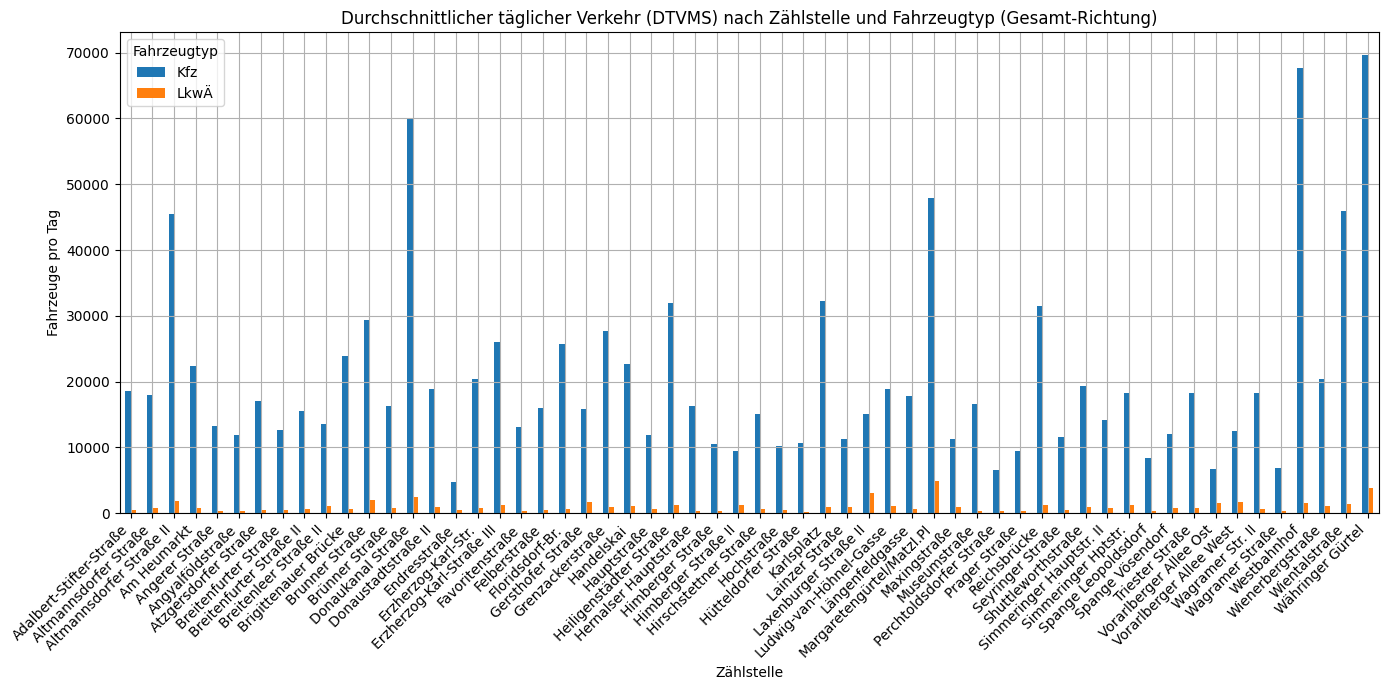

In [14]:
df_gesamt = df_zaehlstellen[df_zaehlstellen['RINAME'] == 'Gesamt']

columns_to_use = ['ZNAME', 'FZTYP', 'DTVMS']
df_filtered = df_gesamt[columns_to_use]

grouped = df_filtered.groupby(['ZNAME', 'FZTYP']).mean(numeric_only=True).reset_index()

pivot_df = grouped.pivot(index='ZNAME', columns='FZTYP', values='DTVMS')

pivot_df.plot(kind='bar', figsize=(14, 7))
plt.title('Durchschnittlicher täglicher Verkehr (DTVMS) nach Zählstelle und Fahrzeugtyp (Gesamt-Richtung)')
plt.xlabel('Zählstelle')
plt.ylabel('Fahrzeuge pro Tag')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Fahrzeugtyp')
plt.grid(True)
plt.show()

### Visualisierung des durchschnittlichen täglichen Verkehrs (DTVMS)

Um das Verkehrsaufkommen an den verschiedenen Zählstellen besser vergleichen zu können, wird der durchschnittliche tägliche Verkehr (DTVMS) getrennt nach Fahrzeugtyp (Kfz und LkwÄ) für jede Zählstelle in der Richtung "Gesamt" visualisiert.

Die Datenbasis wurde zuvor so gefiltert, dass:
- nur richtungsunabhängige Messwerte (RINAME = "Gesamt") berücksichtigt wurden,
- und fehlerhafte Einträge (z.B. mit -29) sowie nicht dem Jahr 2024 zuordenbare Werte ausgeschlossen wurden.

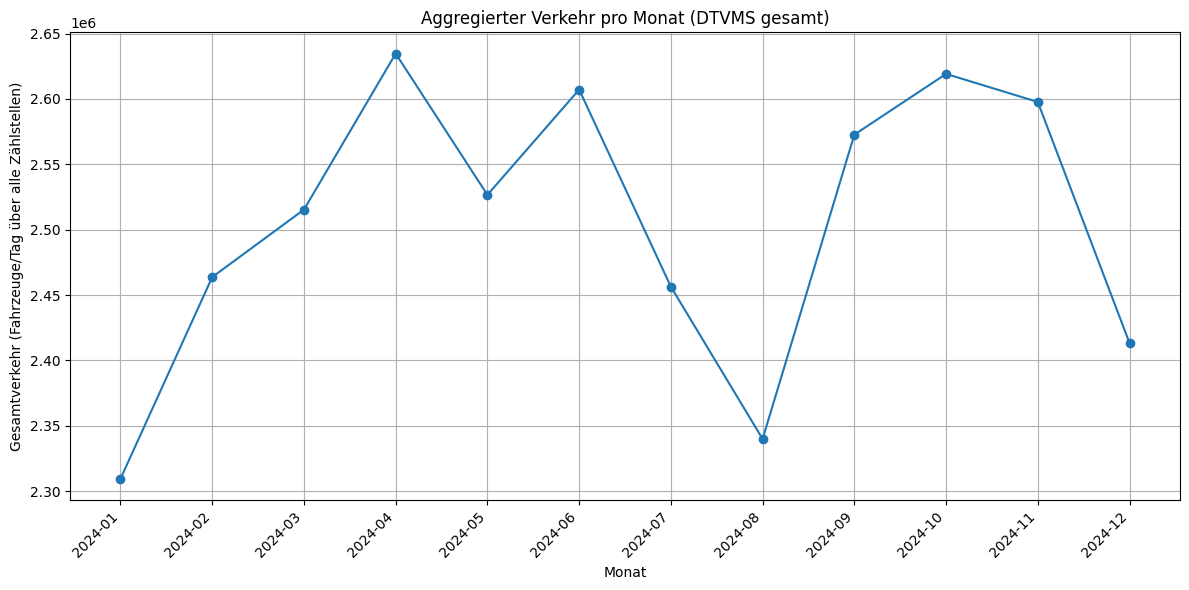

In [15]:
# Monatsdaten aggregieren (über alle Zählstellen und Fahrzeugtypen)
monthly_traffic = df_zaehlstellen.groupby(['JAHR', 'MONAT'])['DTVMS'].sum().reset_index()

# Kombiniertes Jahr-Monat Label
monthly_traffic['JAHR-MONAT'] = monthly_traffic['JAHR'].astype(str) + '-' + monthly_traffic['MONAT'].astype(str).str.zfill(2)

# Linienplot
plt.figure(figsize=(12, 6))
plt.plot(monthly_traffic['JAHR-MONAT'], monthly_traffic['DTVMS'], marker='o')
plt.title('Aggregierter Verkehr pro Monat (DTVMS gesamt)')
plt.xlabel('Monat')
plt.ylabel('Gesamtverkehr (Fahrzeuge/Tag über alle Zählstellen)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Monatliche Entwicklung des Verkehrsaufkommens im Jahr 2024

Zur Untersuchung saisonaler Schwankungen im Verkehrsverhalten wurde der durchschnittliche tägliche Verkehr (DTVMS) über alle Zählstellen und Fahrzeugtypen hinweg pro Monat aggregiert. Dies erlaubt Rückschlüsse auf typische Verkehrsmuster im Jahresverlauf und die Identifikation außergewöhnlicher Monate.

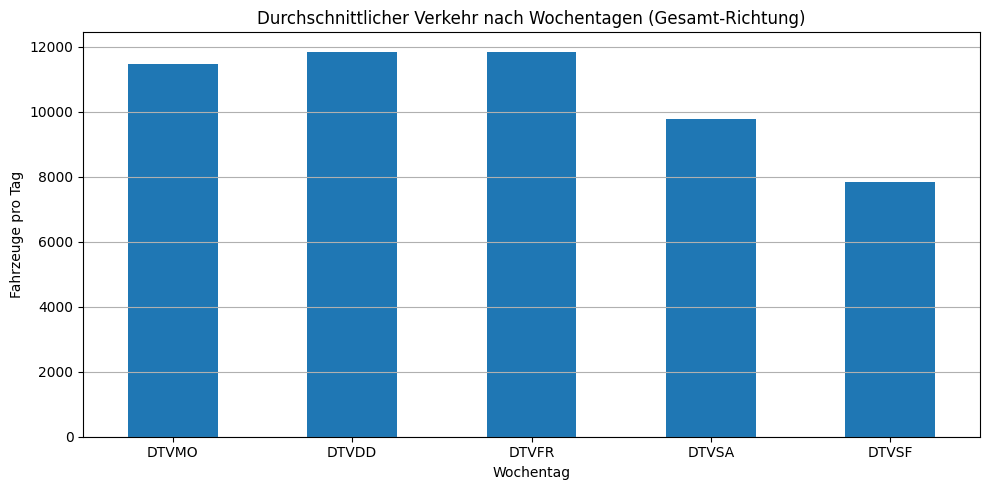

In [16]:
weekday_cols = ['DTVMO', 'DTVDD', 'DTVFR', 'DTVSA', 'DTVSF']
df_gesamt = df_zaehlstellen[df_zaehlstellen['RINAME'] == 'Gesamt']
weekday_means = df_gesamt[weekday_cols].mean()

weekday_means.plot(kind='bar', figsize=(10, 5))
plt.title('Durchschnittlicher Verkehr nach Wochentagen (Gesamt-Richtung)')
plt.ylabel('Fahrzeuge pro Tag')
plt.xlabel('Wochentag')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Durchschnittlicher Verkehr nach Wochentagen (Gesamt-Richtung)

Zur Analyse von Verkehrsmustern im Wochenverlauf wurde das durchschnittliche tägliche Verkehrsaufkommen (DTV) für verschiedene Wochentagsgruppen ausgewertet. Berücksichtigt wurden dabei ausschließlich aggregierte Richtungsdaten (RINAME = "Gesamt"), um eine konsolidierte Betrachtung unabhängig von der Fahrtrichtung zu gewährleisten.

Folgende Kennzahlen wurden einbezogen:
- DTVMO: Verkehr an Montagen (werktags, ohne Feiertage)
- DTVDD: Verkehr Dienstag bis Donnerstag (werktags, ohne Feiertage)
- DTVFR: Verkehr an Freitagen (werktags, ohne Feiertage)
- DTVSA: Verkehr an Samstagen (ohne Feiertage)
- DTVSF: Verkehr an Sonn- und Feiertagen

## Save Cleaned Data

In [17]:
df_zaehlstellen.to_csv("../output/dauerzaehlstellen.csv")